In [64]:
import sys
sys.path.append('../cmake-build-release-gcc/src/')
import numpy as np
import pyslise as ps
p2d = ps.PySE2d(lambda x, y: (1+x^2)*(1+y^2), -5.5,5.5, -5.5,5.5,
                x_count=29, y_count=41, in_sector_count=3, N=12)

In [65]:
n = p2d.N
E = 8.1
xs = np.linspace(-2, 2, 1000)
ds1 = [abs(np.linalg.det(p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), -5.5, x)[0])) for x in xs]
ds2 = [abs(np.linalg.det(p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), 5.5, x)[0])) for x in xs]
ds3 = [abs(np.linalg.det(p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), 5.5, x)[0] - p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), -5.5, x)[0])) for x in xs]

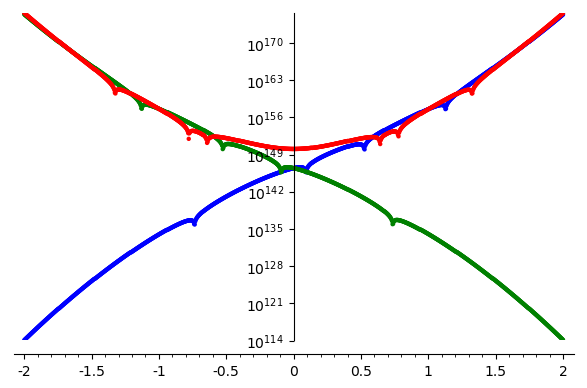

In [66]:
list_plot_semilogy(zip(xs, ds1))+list_plot_semilogy(zip(xs, ds2), color="green")+list_plot_semilogy(zip(xs, ds3), color="red")

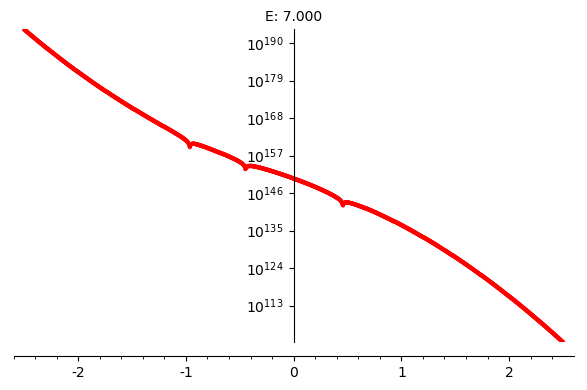

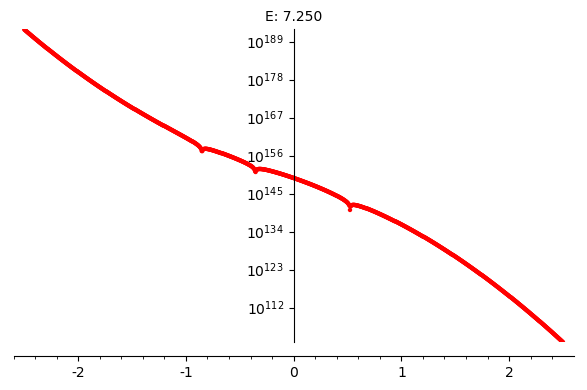

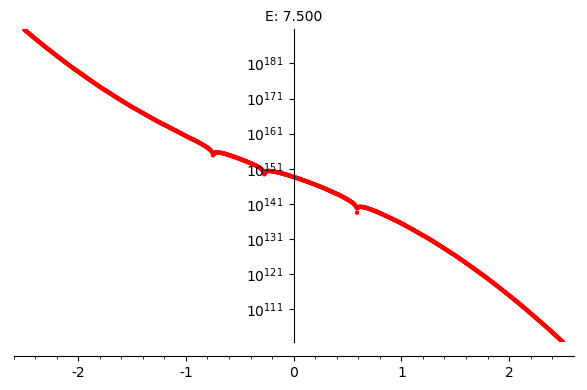

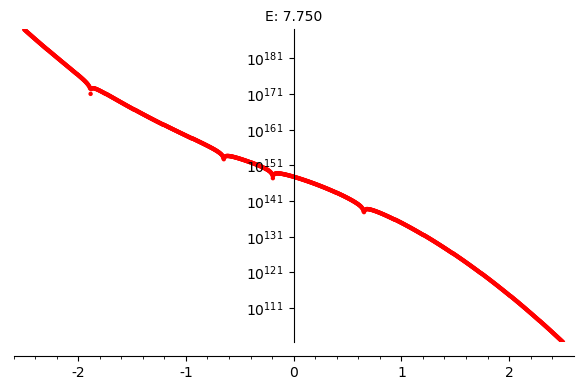

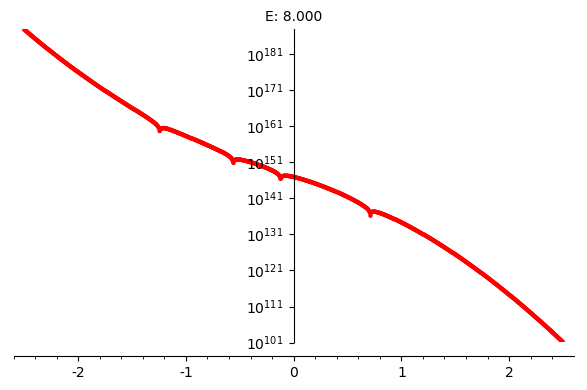

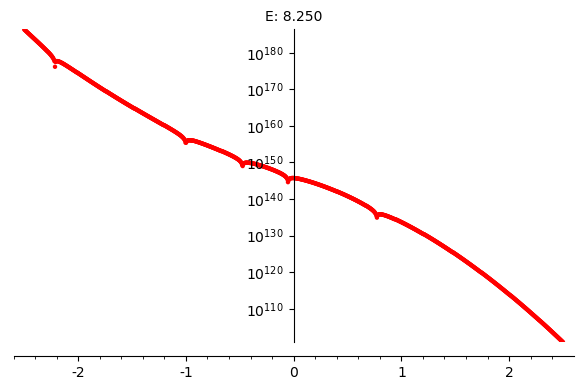

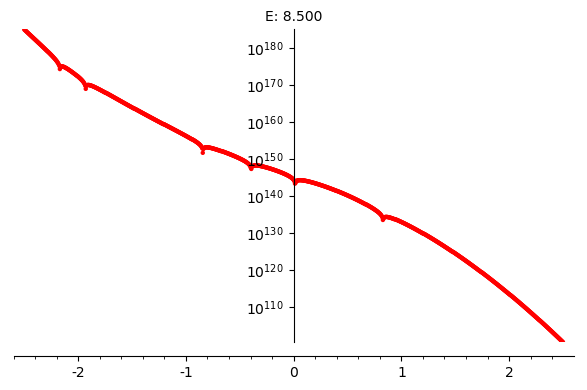

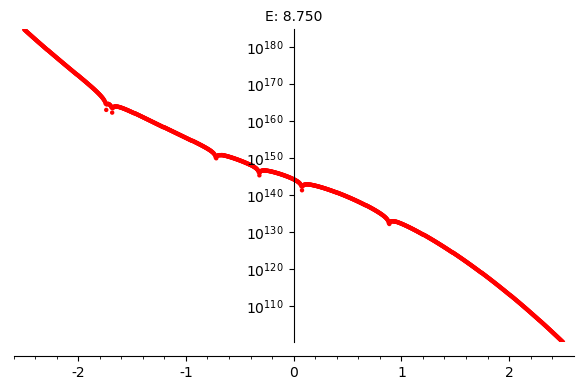

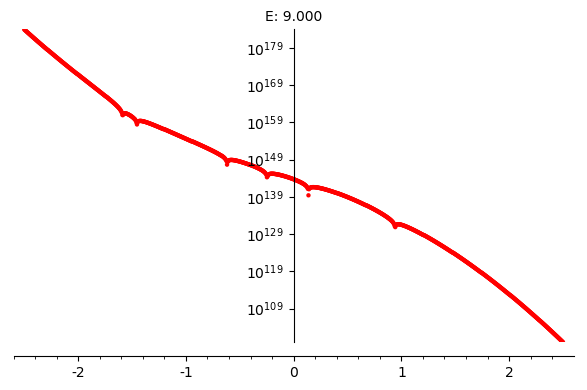

In [72]:
xs = np.linspace(-2.5, 2.5, 1000)
for E in [7,7.25 .. 9]:
    ds3 = [abs(np.linalg.det(
            p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), 5.5, x)[0]
            # - p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), -5.5, x)[0]
            )) for x in xs]
    list_plot_semilogy(zip(xs, ds3), color="red", title="E: %.3f"%E).show()

In [33]:
p2d.findEigenvalue(5)

3.195918085264431